In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

In [ ]:
St = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALL_SPB_STOPS.csv', sep=";", header = 0, index_col='STOP_NAME',  encoding='cp1251')

In [ ]:
St.head()

,ID_STOP,LATITUDE,LONGITUDE
STOP_NAME,,,
Пр.Ветеранов-1,100101,59.841604,30.253984
Пр.Ветеранов-2,100102,59.842042,30.250084
Ленинский пр.-1,100103,59.851683,30.268385
Ленинский пр.-2,100104,59.849710,30.268348
Автово,100105,59.867292,30.261133


In [ ]:
row = St.loc["Приморская"]
print(row)

ID_STOP      100301.000000
LATITUDE         59.948559
LONGITUDE        30.234443
Name: Приморская, dtype: float64


In [ ]:
St = St.query('(LATITUDE - 59.948559)*(LATITUDE - 59.948559) + (LONGITUDE - 30.234443)*(LONGITUDE - 30.234443) < 0.0001')

In [ ]:
St.head()

,ID_STOP,LATITUDE,LONGITUDE
STOP_NAME,,,
Приморская,100301,59.948559,30.234443
"Метро ""Приморская"" (10)",14903,59.948804,30.231600
"Улица Нахимова / Наличная улица (9, 10, 11)",14906,59.942403,30.231199
Набережная реки Смоленки (10),14908,59.946803,30.230499
"Улица Кораблестроителей (конечная, 9, 10, 11)",15006,59.956564,30.234421


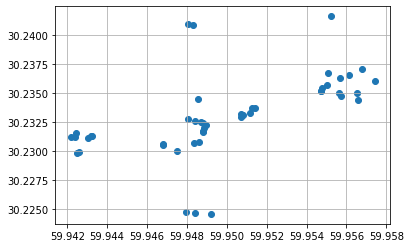

In [ ]:
#St = St[['LATITUDE', 'LONGITUDE']]
plt.scatter(St['LATITUDE'], St['LONGITUDE'])
plt.grid()

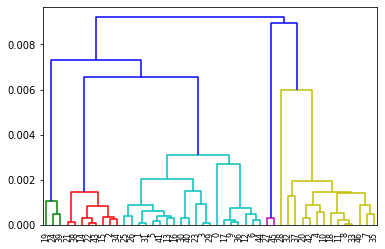

In [ ]:
link = linkage(St[['LATITUDE', 'LONGITUDE']], 'centroid', 'euclidean')
dn = dendrogram(link)

In [ ]:
St['cluster'] = fcluster(link, 7, criterion='maxclust')

In [ ]:
St.groupby('cluster').size()

cluster
1     3
2     8
3    13
4     7
5     2
6    13
7     1
dtype: int64

In [ ]:
St = St.sort_values(by='cluster')
print(St['cluster'])

STOP_NAME
МАГАЗИН "СТРОИТЕЛЬ" [7]                          1
НОВОСМОЛЕНСКАЯ НАБ.,6 [7]<                       1
НОВОСМОЛЕНСКАЯ НАБ.,6 [7]                        1
Улица Нахимова (9, 11)                           2
УЛ. НАХИМОВА [1, 6]                              2
Улица Нахимова (10)                              2
Улица Нахимова / Наличная улица (9, 10, 11)      2
УЛ. НАХИМОВА [1, 6]<                             2
Улица Нахимова T (1, 6)                          2
Улица Нахимова T (1, 6)                          2
НАЛИЧНАЯ УЛ. УГ. УЛ. НАХИМОВА [7]<               2
Метро "Приморская" T (1, 6)                      3
СТ. МЕТРО "ПРИМОРСКАЯ" [128]<                    3
НОВОСМОЛЕНСКАЯ НАБ.(ТЕСТ)                        3
СТ. МЕТРО "ПРИМОРСКАЯ" [7]                       3
СТ. МЕТРО "ПРИМОРСКАЯ"                           3
СТАНЦИЯ МЕТРО "ПРИМОРСКАЯ"                       3
НОВОСМОЛЕНСКАЯ НАБ.,2 [7]                        3
Метро "Приморская" (10)                          3
Набережная реки Смоле